# Sklearn - Models

The model is trying to learn the data and learn about the stuff.

## Semen Code analysis

| New Column | Description |
|------------|-------------|
|'T-WG' | Temperature × Wind Gust |
|'H-WG' | Humidity × Wind Gust |
|'CC-WG' | Cloud Cover × Wind Gust |
|'SR-WG' | Solar Radiation × Wind Gust |
|'T-WS' | Temperature × Wind Speed |
|'H-WS' | Humidity × Wind Speed |
|'CC-WS' | Cloud Cover × Wind Speed |
|'SR-WS' | Solar Radiation × Wind Speed |

### Import packages:

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


## Create mock data


In [2]:
from tomodachi_core.testing.testdata.mockdata import people_data

df = pd.DataFrame(people_data["people"])
print(df.head())

      name  age         city occupation  salary
0    Alice   30     New York   Engineer   70000
1      Bob   25  Los Angeles   Designer   60000
2  Charlie   35      Chicago    Teacher   50000


In [3]:
# import the model
from tomodachi_core.models import DemographicSalaryModel

R²: nan
{'cat__city_Los Angeles': np.float64(0.12837826942813824), 'cat__city_New York': np.float64(0.0), 'cat__occupation_Engineer': np.float64(0.0), 'cat__occupation_Teacher': np.float64(0.5990785294366127), 'num__age': np.float64(0.2725432011352491)}


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\Desktop\python_app\tuuleenergia_tomodachi\tomodachi_core\models\demographic_salary_model\demographic_salary_model.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, palette="coolwarm")


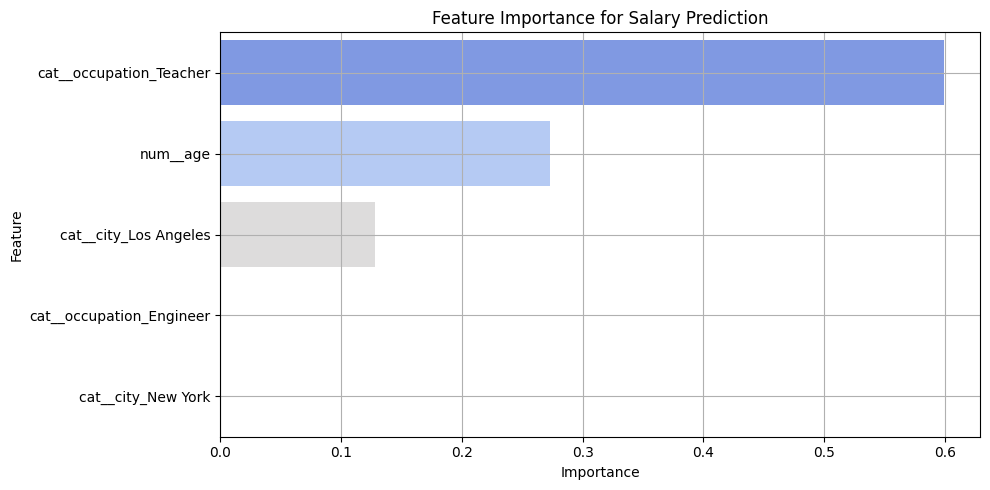

In [4]:
model = DemographicSalaryModel(people_data["people"])
model.preprocess()
model.train_model()
print(model.get_feature_importance())
model.visualize()

<Axes: xlabel='occupation', ylabel='salary'>

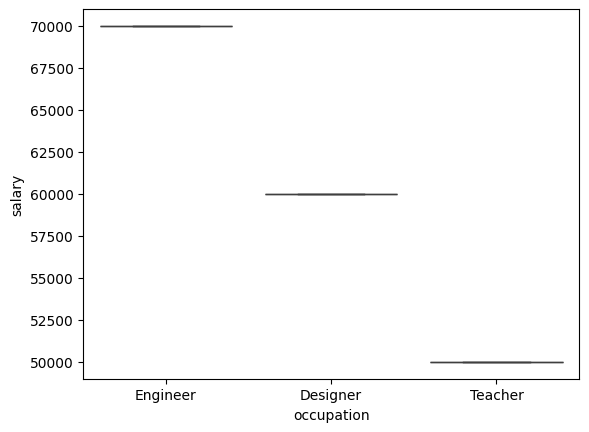

In [5]:
sns.boxplot(x="occupation", y="salary", data=model.df)


## Weather Impact Model

In [8]:
from tomodachi_core.models import WeatherImpactModel
from tomodachi_core.config_development.config import SAVE_TO_PATH
import os
import pathlib
from pprint import pprint

# get curr dir
current_dir = os.getcwd()

# find the root using patlihb
root_dir = pathlib.Path(current_dir).parents[1].resolve()

# get the path to the csv file
path_to_csv = (root_dir / SAVE_TO_PATH).resolve()
print(path_to_csv)

C:\Users\Lenovo\Desktop\python_app\tuuleenergia_tomodachi\shared\data\processed\cleaned_Synthetic_Wind_Power.csv


R²: 0.872


C:\Users\Lenovo\Desktop\python_app\tuuleenergia_tomodachi\tomodachi_core\models\weather_impact_model\weather_impact_model.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self.feature_importances[sorted_idx], y=self.feature_names[sorted_idx], palette='viridis')


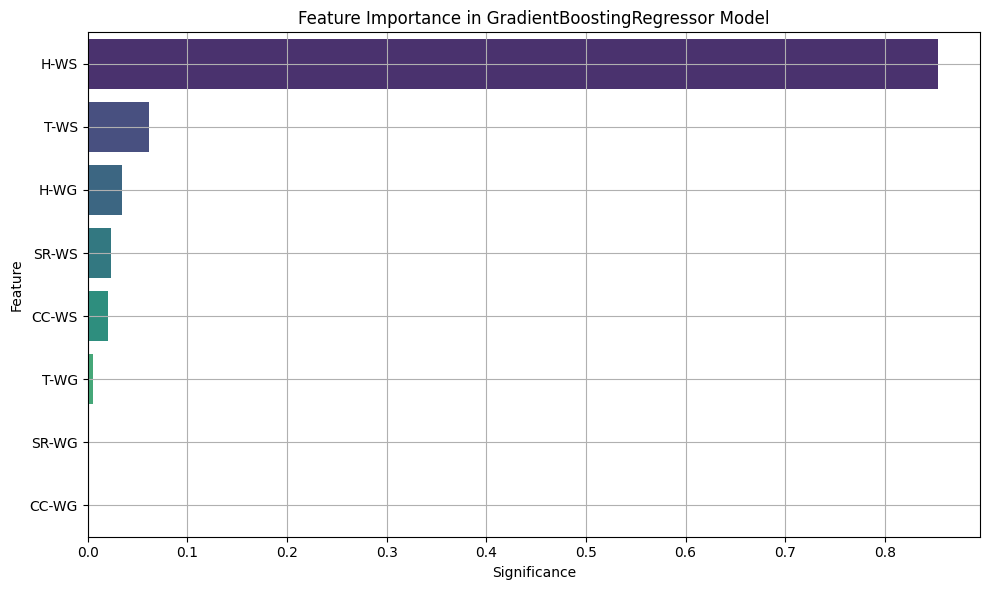

In [ ]:
weather_model = WeatherImpactModel(None, path_to_csv)
results = weather_model.run_analysis(True, True)


In [9]:
pprint(results)

{'CC-WG': np.float64(0.0009563341770291092),
 'CC-WS': np.float64(0.02005935066208857),
 'H-WG': np.float64(0.03452388053983025),
 'H-WS': np.float64(0.852826715554882),
 'SR-WG': np.float64(0.0010932863389087441),
 'SR-WS': np.float64(0.023045637326038457),
 'T-WG': np.float64(0.005801131790402118),
 'T-WS': np.float64(0.0616936636108208)}


## Analysis


| Feature | Description | Importance | What It Tells You|
|---------|-------------|------------|------------------|
H-WS | Humidity × Wind Speed | 0.85 | This combo is super important for predicting power output. Likely, wind speed’s power changes significantly when humidity is high or low.
T-WS | Temperature × Wind Speed | 0.0617 | Noticeably useful. Wind speed interacting with temperature affects power output, but not as drastically as humidity.
H-WG | Humidity × Wind Gust | 0.0345 | Still relevant. Maybe short wind bursts + humidity play a role (maybe turbulence or inefficiency in power capture?).
SR-WS | Solar Radiation × Wind Speed | 0.023 | Mildly useful. Maybe solar radiation enhances wind efficiency in certain weather?
CC-WS | Cloud Cover × Wind Speed | 0.020 | Less impactful. Could be that cloudy days don’t strongly affect wind power unless paired with other factors.
T-WG | Temperature × Wind Gust | 0.0058 | Barely useful. Probably not that crucial for output.
SR-WG | Solar Radiation × Wind Gust | 0.001 | Almost negligible.
CC-WG | Cloud Cover × Wind Gust | 0.0009 | Dead last. Almost irrelevant to output prediction.

In [11]:
sorted_features = sorted(results.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_features)
cumulative_importance = np.cumsum(importances)
pprint(cumulative_importance)

array([0.85282672, 0.91452038, 0.94904426, 0.9720899 , 0.99214925,
       0.99795038, 0.99904367, 1.        ])


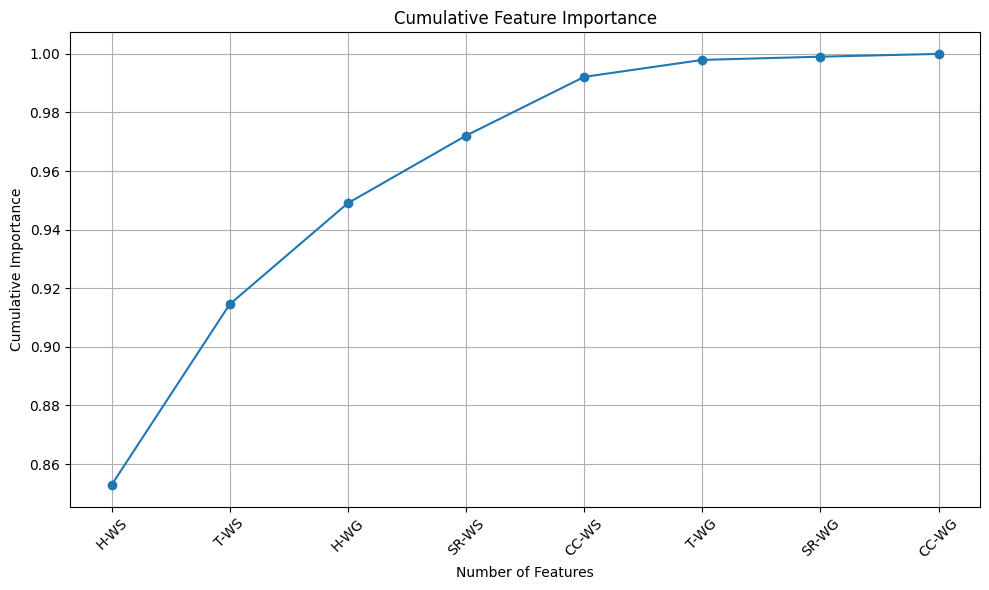

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features) + 1), cumulative_importance, marker='o')
plt.xticks(range(1, len(features) + 1), features, rotation=45)
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()

### Training reduces model

In [14]:
# Load the data
df = weather_model.df.copy()

# Define the target and feature columns
reduced_features = ['H-WS', 'T-WS', 'H-WG']
target_column = 'Wind_Speed'

# Split the data into training and testing sets
X_full = df[results.keys()]
X_reduced = df[reduced_features]
y = df[target_column]

In [17]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train full model
model_full = GradientBoostingRegressor(random_state=42)
model_full.fit(Xf_train, yf_train)
y_pred_full = model_full.predict(Xf_test)

# Train reduced model
model_reduced = GradientBoostingRegressor(random_state=42)
model_reduced.fit(Xr_train, yr_train)
y_pred_reduced = model_reduced.predict(Xr_test)

# Compare results
print("🔹 Full model R²:", r2_score(yf_test, y_pred_full))
print("🔹 Reduced model R²:", r2_score(yr_test, y_pred_reduced))

print("🔹 Full model RMSE:", root_mean_squared_error(yf_test, y_pred_full))
print("🔹 Reduced model RMSE:", root_mean_squared_error(yr_test, y_pred_reduced))

🔹 Full model R²: 0.9637901411820367
🔹 Reduced model R²: 0.9583895455577451
🔹 Full model RMSE: 1.5400270290537232
🔹 Reduced model RMSE: 1.6508824735761725


## Analysis

| Metric | Full Model | Reduced Model | Difference
|--------|------------|---------------|-----------|
|R² | 0.9638 | 0.9584 | ≈ 0.005 drop
| RMSE | 1.5400 | 1.6509 | ≈ 0.11 increase